# Линейная алгебра и приложения в многомерной статистике

*Алла Тамбовцева, НИУ ВШЭ*

## Метод главных компонент: практикум с библиотекой `sklearn`

### Часть 1: реализуем МГК и выбираем число компонент

Импортируем необходимые библиотеки и модули:

* стандартный набор: `pandas` для работы с таблицами, `numpy` для работы с массивами, `matplotlib` для графики;
* функция, а точнее, класс `StandardScaler()` из `sklearn` для стандартизации данных;
* функция, а точнее, класс `PCA()` из `sklearn` для реализации МГК.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Загрузим данные по пиццам из файла `pizza.csv`:

In [2]:
# вспоминаем английский и лексику из тем о правильном питании :)

pizza = pd.read_csv("pizza.csv")
pizza.head()

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67


Пояснения по столбцам:

* `brand`: зашифрованное название производителя пиццы;
* `id`: id пиццы;
* `mois`: содержание (здесь и далее – все на 100 граммов пиццы);
* `prot`: содержание белков;
* `fat`: содержание жиров;
* `ash`: содержание минеральных веществ (зольные вещества);
* `sodium`: содержание натрия;
* `carb`: содержание углеводов;
* `cal`: калорийность пиццы.

Одна строка в таблице – пицца одного вида (четыре сыра, пепперони, классическая и прочие, просто он зашифрован), выпускаемая определенным производителем. Выберем столбцы типа `float` – текстовое название бренда нам не подойдёт, целочисленный id тоже ни к чему:

In [3]:
X = pizza.select_dtypes(float)
X.head()

,mois,prot,fat,ash,sodium,carb,cal
0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,30.49,21.28,41.65,4.82,1.64,1.76,4.67


Выбранные показатели связаны друг с другом, наша **задача** – на основе 7 показателей, связанных друг с другом, получить 7 главных компонент, а затем отобрать из них несколько самых информативных (менее 7). Проверим, что переменные связаны между собой линейной связью – построим корреляционную матрицу:

In [4]:
print(X.corr())

            mois      prot       fat       ash    sodium      carb       cal
mois    1.000000  0.360248 -0.171318  0.265556 -0.102279 -0.591802 -0.764441
prot    0.360248  1.000000  0.498002  0.823844  0.429130 -0.853542  0.070258
fat    -0.171318  0.498002  1.000000  0.791634  0.933325 -0.640238  0.764567
ash     0.265556  0.823844  0.791634  1.000000  0.808122 -0.898988  0.326468
sodium -0.102279  0.429130  0.933325  0.808122  1.000000 -0.620176  0.671958
carb   -0.591802 -0.853542 -0.640238 -0.898988 -0.620176  1.000000 -0.023485
cal    -0.764441  0.070258  0.764567  0.326468  0.671958 -0.023485  1.000000


Для наглядности можем построить матрицу диаграмм рассеивания (диаграммы рассеяивания для всех пар показателей, на диагонали – гистограммы для каждого показателя):

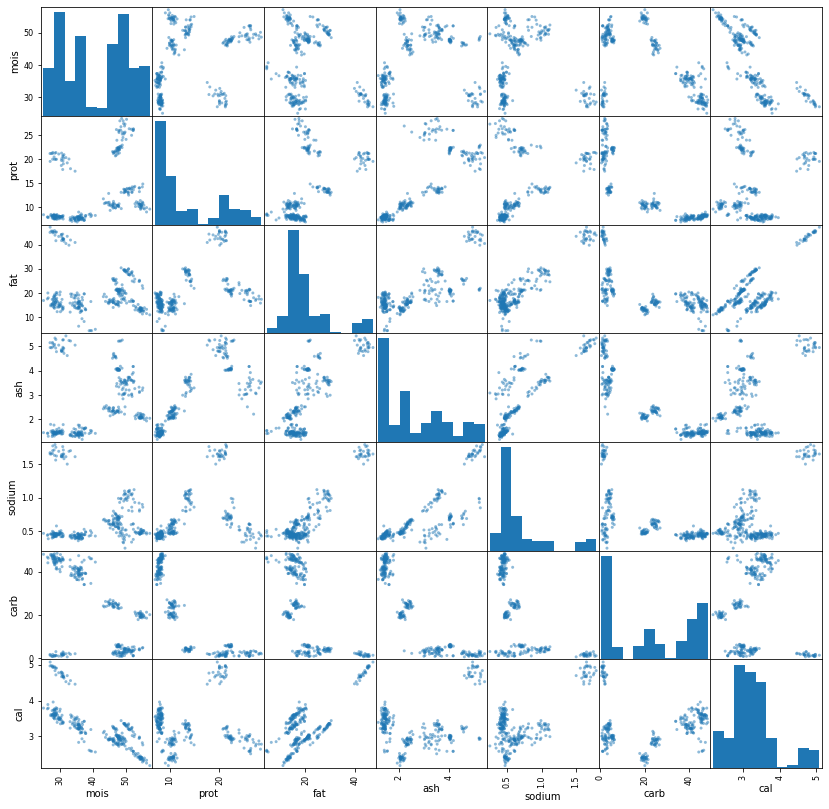

In [5]:
# размер 14 на 14 дюймов

pd.plotting.scatter_matrix(X, 
                           figsize = (14, 14));

Прошкалируем данные – выполним их стандартизацию с помощью `StandardScaler()`:

In [6]:
# fit_transform: 
# fit: считает среднее и ст отклонение
# transform: использует их и стандартизирует данные

X_scaled = StandardScaler().fit_transform(X) # массив
X_scaled = pd.DataFrame(X_scaled) # датафрейм
X_scaled.columns = X.columns # добавляем названия для ясности
X_scaled.head(15)

,mois,prot,fat,ash,sodium,carb,cal
0,-1.371815,1.254181,2.749841,1.953894,2.976687,-1.227511,2.680129
1,-1.301562,1.227717,2.640475,2.135338,3.030779,-1.213622,2.534733
2,-1.316242,1.030010,2.851396,1.930227,2.598042,-1.225844,2.712439
3,-1.085563,1.054918,2.555660,1.701449,2.543950,-1.193622,2.373183
4,-1.091854,1.230830,2.390494,1.725116,2.625088,-1.172510,2.260097
5,-1.023699,1.067372,2.464149,1.804005,2.652134,-1.192510,2.260097
6,-1.016359,1.182571,2.355898,1.638338,2.462812,-1.171954,2.195477
7,-1.273252,1.251068,2.384914,2.088005,2.922595,-1.106398,2.340872
8,-1.329873,1.106290,2.775509,1.882894,2.814410,-1.204733,2.680129
9,-1.382300,1.216819,2.796713,1.993338,2.679180,-1.234733,2.712439


Чтобы не было сомнений, что данные центрированы и нормированы, посмотрим на описательные статистики:

In [7]:
# так и есть, среднее 0, ст отклонение 1

X_scaled.describe().round(2)

,mois,prot,fat,ash,sodium,carb,cal
count,300.00,300.00,300.00,300.00,300.00,300.00,300.00
mean,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.67,-1.00,-1.77,-1.15,-1.13,-1.24,-1.76
25%,-1.05,-0.83,-0.61,-0.93,-0.59,-1.08,-0.58
50%,0.25,-0.46,-0.35,-0.32,-0.49,0.02,-0.09
75%,0.86,1.04,0.13,0.76,0.09,1.03,0.40
max,1.71,2.35,3.01,2.21,3.03,1.43,2.92


Несмотря на то, что мы изменили шкалу, сделав так, что у всех показателей стандартное отклонение 1, разброс значений переменных везде различный – посмотрите на квартили и размах, сравнив минимум и максимум.

Связи в данных после стандартизации тоже не «потярялись»:

In [8]:
print(X_scaled.corr())

            mois      prot       fat       ash    sodium      carb       cal
mois    1.000000  0.360248 -0.171318  0.265556 -0.102279 -0.591802 -0.764441
prot    0.360248  1.000000  0.498002  0.823844  0.429130 -0.853542  0.070258
fat    -0.171318  0.498002  1.000000  0.791634  0.933325 -0.640238  0.764567
ash     0.265556  0.823844  0.791634  1.000000  0.808122 -0.898988  0.326468
sodium -0.102279  0.429130  0.933325  0.808122  1.000000 -0.620176  0.671958
carb   -0.591802 -0.853542 -0.640238 -0.898988 -0.620176  1.000000 -0.023485
cal    -0.764441  0.070258  0.764567  0.326468  0.671958 -0.023485  1.000000


Выведем размерность датафрейма и сохраним число столбцов в переменную `p` – нам потребуется получить ровно столько же главных компонент (а из них позже уже отберём наиболее информативные):

In [9]:
# 300 строк и 7 столбцов
print(X_scaled.shape)

(300, 7)


In [10]:
# забираем второй элемент
p = X_scaled.shape[1]
print(p)

7


Чтобы далее добавлять к полученным результатам понятные подписи, создадим список с названиями главных компонент `PC1`-`PC7`:

In [11]:
pca_names = ["PC" + str(i) for i in range(1, p + 1)]
print(pca_names)

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']


Создадим объект класса `PCA`, в котором позже будут храниться результаты реализации метода главных компонент:

In [12]:
# pca – контейнер для хранения результатов PCA
# пока там только информация о числе компонент

pca = PCA(n_components = p)
print(pca)

PCA(n_components=7)


Реализуем МГК на данных `X_scaled`, применив метод `.fit_transform()` к объекту `pca`:

In [13]:
# fit_transform:
# fit: вычисляет веса для столбцов
# transform: умножает столбцы из X_scaled на эти веса,
# т.е. преобразует исходные данные

pca_res = pd.DataFrame(pca.fit_transform(X_scaled))
print(pca_res) # массив

            0         1         2         3         4         5         6
0    5.010343  2.679215 -0.039327  0.144106 -0.284015  0.002339 -0.000960
1    5.023755  2.529295 -0.097056  0.353950 -0.215269 -0.002952 -0.001022
2    4.805439  2.673700 -0.075475 -0.107798  0.035038 -0.005424 -0.000832
3    4.469543  2.285029 -0.120233 -0.054028 -0.174501 -0.005627 -0.000946
4    4.471893  2.159152 -0.000738  0.117166 -0.313027 -0.001689 -0.000968
..        ...       ...       ...       ...       ...       ...       ...
295 -0.535510 -0.530843 -0.426490  0.229258 -0.031016 -0.050825  0.034726
296 -0.339636 -0.243230 -0.281174  0.064289 -0.069664  0.000082 -0.000233
297 -0.646433 -0.515434 -0.370378  0.249294 -0.043557 -0.002110 -0.000239
298 -0.865078 -0.921790 -0.493755  0.127400  0.024342 -0.001823 -0.000163
299 -0.895868 -0.767878 -0.530108  0.114224  0.026413 -0.000102 -0.000138

[300 rows x 7 columns]


Превратим результат в датафрейм и добавим названия столбцов для наглядности:

In [14]:
pca_res.columns = pca_names
pca_res

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,5.010343,2.679215,-0.039327,0.144106,-0.284015,0.002339,-0.000960
1,5.023755,2.529295,-0.097056,0.353950,-0.215269,-0.002952,-0.001022
2,4.805439,2.673700,-0.075475,-0.107798,0.035038,-0.005424,-0.000832
3,4.469543,2.285029,-0.120233,-0.054028,-0.174501,-0.005627,-0.000946
4,4.471893,2.159152,-0.000738,0.117166,-0.313027,-0.001689,-0.000968
...,...,...,...,...,...,...,...
295,-0.535510,-0.530843,-0.426490,0.229258,-0.031016,-0.050825,0.034726
296,-0.339636,-0.243230,-0.281174,0.064289,-0.069664,0.000082,-0.000233
297,-0.646433,-0.515434,-0.370378,0.249294,-0.043557,-0.002110,-0.000239
298,-0.865078,-0.921790,-0.493755,0.127400,0.024342,-0.001823,-0.000163


**NB.** В `sklearn` более новой версии результаты могут отличаться. Мы обсуждали, что нет единственного решения при получении собственных векторов ковариационной матрицы, даже если мы добавим ограничение на длину векторов. Из-за этого веса исходных показателей в главных компонентах могут быть другими, а значит, и значения главных компонент тоже. Так, в примере на семинаре мы получили веса $(\frac{5}{\sqrt{26}}, \frac{1}{\sqrt{26}})^T$ для переменных в первой главной компоненте и $(-\frac{1}{\sqrt{26}}, \frac{5}{\sqrt{26}})^T$ – во второй. Если бы мы по-другому выбрали знаки при решении системы уравнений, мы бы получили веса $(-\frac{5}{\sqrt{26}}, -\frac{1}{\sqrt{26}})^T$ и $(\frac{1}{\sqrt{26}}, -\frac{5}{\sqrt{26}})^T$, и это тоже было бы корректно, так как полученные вектор-столбцы позволяют задать матрицу поворота со всеми необходимыми свойствами. Поскольку расхождения возникают только из-за знаков, различия будут только в интерпретации главных компонент. 

Мы получили датафрейм со значениями каждой главной компоненты для каждого наблюдения. Первая строка, например, это координаты первой пиццы в новом пространстве из семи главных компонент. А первый столбец – значения первой главной компоненты для каждой пиццы в данных, то есть значения некоторого интегрального индекса качества пиццы для каждой пиццы. Что это за индекс с содержательной точки зрения, попробуем проинтерпретировать чуть позже, а пока посмотрим на **информативность главных компонент**. 

Выведем **дисперсии** главных компонент – **собственные значения** ковариационной матрицы:

In [15]:
pca_var = pca.explained_variance_
print(pca_var.round(2))

[4.19 2.3  0.42 0.1  0.03 0.   0.  ]


Итак, дисперсия первой главной компоненты 4.19, второй – 2.3, третьей 0.42, далее дисперсии совсем маленькие. По **правилу Кайзера** следует извлечь две главные компоненты, так как только два собственных значения (две дисперсии) больше 1. Значения, которые мы получили в массиве выше – это главная диагональ матрицы $S$, которую мы рассматривали на лекции.

Визуализуем результаты – построим **график каменистой осыпи**, он же график согнутого локтя, он же график согнутого колена, он же график сломанной трости:

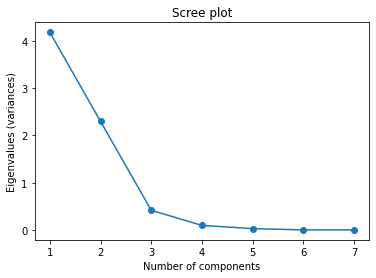

In [16]:
# по оси x – число компонент от 1 до 7
# по оси y – собственные значения (дисперсии)

plt.plot(range(1, p + 1), pca_var, "o-");
plt.title("Scree plot");
plt.xlabel("Number of components");
plt.ylabel("Eigenvalues (variances)");

Как и все графические способы, этот метод определения числа главных компонент не совсем однозначный. Обычно считается, что нужно извлечь столько главных компонент, сколько находятся до излома (колена/локтя) на графике. Здесь излом происходит на трех главных компонентах, формально до него две главные компоненты, включать ли третью или нет – уже на усмотрение исследователя. Можно согласовать результаты с другими методами определения числа главных компонент. 

Вычислим доли дисперсии исходных данных, которые объясняет каждая главная компонента (переведём в проценты и округлим):

In [17]:
pca_var_ratio = pca.explained_variance_ratio_
print((pca_var_ratio * 100).round(2))

[59.6  32.72  5.92  1.36  0.4   0.    0.  ]


Первая главная компонента объясняет 59.6% дисперсии исходных данных, вторая – 32.72% дисперсии исходных данных. В сумме эти две главные компоненты объясняют примерно 92% дисперсии, этого достаточно (более 80% на практике). Чтобы не считать совокупные проценты объясненной дисперсии самостоятельно, можно воспользоваться функцией `cumsum()` для массивов:

In [18]:
# cumsum() от cumulative sum
# накопленные значения

np.cumsum((pca_var_ratio * 100).round(2))

array([ 59.6 ,  92.32,  98.24,  99.6 , 100.  , 100.  , 100.  ])

Теперь точно видно, что две первые главные компоненты объясняют 92.32% дисперсии исходных данных, три компоненты – уже 98.24%, пять компонент – уже 100%, дальше две компоненты уже не дают прироста информативности.

Выведем нагрузки – веса, те значения, которые являются координатами единичных собственных векторов ковариационной матрицы:

In [19]:
# строка = собственный вектор для одной компоненты
print(pca.components_)

[[ 6.47093729e-02  3.78760904e-01  4.46665915e-01  4.71889526e-01
   4.35702887e-01 -4.24913712e-01  2.44487304e-01]
 [-6.28275866e-01 -2.69706650e-01  2.34379085e-01 -1.10990417e-01
   2.01661652e-01  3.20312078e-01  5.67457559e-01]
 [-4.21668945e-01  7.46027442e-01 -1.99308714e-01  5.62726863e-02
  -4.55168874e-01  5.22365058e-02  1.13315588e-01]
 [-2.20721584e-01 -1.05931982e-02 -5.07042158e-01  5.52398549e-01
   4.46276890e-01  3.34339481e-01 -2.79263154e-01]
 [-6.47029345e-03 -3.87982788e-01  1.73367634e-01  6.70885701e-01
  -6.02614079e-01  7.43689883e-03  7.80031747e-02]
 [ 4.46449902e-01 -1.71520299e-04 -5.25402868e-01  5.88609281e-02
   3.13098518e-03 -5.08853524e-04  7.21913853e-01]
 [ 4.18569035e-01  2.76764643e-01  3.77671525e-01  5.60214003e-02
  -5.24323817e-04  7.76067911e-01  1.20598098e-02]]


Для наглядности преобразуем массив выше в датафрейм:

In [20]:
pd.DataFrame(pca.components_)

,0,1,2,3,4,5,6
0,0.064709,0.378761,0.446666,0.471890,0.435703,-0.424914,0.244487
1,-0.628276,-0.269707,0.234379,-0.110990,0.201662,0.320312,0.567458
2,-0.421669,0.746027,-0.199309,0.056273,-0.455169,0.052237,0.113316
3,-0.220722,-0.010593,-0.507042,0.552399,0.446277,0.334339,-0.279263
4,-0.006470,-0.387983,0.173368,0.670886,-0.602614,0.007437,0.078003
5,0.446450,-0.000172,-0.525403,0.058861,0.003131,-0.000509,0.721914
6,0.418569,0.276765,0.377672,0.056021,-0.000524,0.776068,0.012060


Обычно нагрузки для каждой компоненты записывают по столбцам, поэтому транспонируем таблицу выше и закрепим за строками и столбцами понятные названия:

In [21]:
rotation_matrix = pd.DataFrame(pca.components_).T
rotation_matrix.columns = pca_names
rotation_matrix.index = X.columns
rotation_matrix

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
mois,0.064709,-0.628276,-0.421669,-0.220722,-0.006470,0.446450,0.418569
prot,0.378761,-0.269707,0.746027,-0.010593,-0.387983,-0.000172,0.276765
fat,0.446666,0.234379,-0.199309,-0.507042,0.173368,-0.525403,0.377672
ash,0.471890,-0.110990,0.056273,0.552399,0.670886,0.058861,0.056021
sodium,0.435703,0.201662,-0.455169,0.446277,-0.602614,0.003131,-0.000524
carb,-0.424914,0.320312,0.052237,0.334339,0.007437,-0.000509,0.776068
cal,0.244487,0.567458,0.113316,-0.279263,0.078003,0.721914,0.012060


Итак, здесь `rotation_matrix` – это матрица поворота, она же матрица перехода $R$, которую мы рассматривали на занятии. Проверим, что на столбцы выше можно смотреть как на вектор-столбцы единичной длины:

In [22]:
# считаем, что 1
print((rotation_matrix["PC1"] ** 2).sum()) 
print((rotation_matrix["PC2"] ** 2).sum())

0.9999999999999996
0.9999999999999999


В завершении «технического» описания полученных результатов, проверим, что умножение исходного массива `X_scaled` на эту матрицу даст те же результаты, которые мы получили в `pca_res`, то есть значения каждой главной компоненты для каждого наблюдения:

In [23]:
# rotation_matrix: исходные x по строкам
# X_scaled: исходные х по столбцам

pd.DataFrame(np.dot(X_scaled, rotation_matrix))

,0,1,2,3,4,5,6
0,5.010343,2.679215,-0.039327,0.144106,-0.284015,0.002339,-0.000960
1,5.023755,2.529295,-0.097056,0.353950,-0.215269,-0.002952,-0.001022
2,4.805439,2.673700,-0.075475,-0.107798,0.035038,-0.005424,-0.000832
3,4.469543,2.285029,-0.120233,-0.054028,-0.174501,-0.005627,-0.000946
4,4.471893,2.159152,-0.000738,0.117166,-0.313027,-0.001689,-0.000968
...,...,...,...,...,...,...,...
295,-0.535510,-0.530843,-0.426490,0.229258,-0.031016,-0.050825,0.034726
296,-0.339636,-0.243230,-0.281174,0.064289,-0.069664,0.000082,-0.000233
297,-0.646433,-0.515434,-0.370378,0.249294,-0.043557,-0.002110,-0.000239
298,-0.865078,-0.921790,-0.493755,0.127400,0.024342,-0.001823,-0.000163


Сравним коэффициенты корреляции между исходными переменными и итоговыми главными компонентами:

In [24]:
# было: скоррелированные переменные
print(X.corr().round(3)) 

# стало: нескоррелированные комноненты
print(pca_res.corr().round(3)) 

         mois   prot    fat    ash  sodium   carb    cal
mois    1.000  0.360 -0.171  0.266  -0.102 -0.592 -0.764
prot    0.360  1.000  0.498  0.824   0.429 -0.854  0.070
fat    -0.171  0.498  1.000  0.792   0.933 -0.640  0.765
ash     0.266  0.824  0.792  1.000   0.808 -0.899  0.326
sodium -0.102  0.429  0.933  0.808   1.000 -0.620  0.672
carb   -0.592 -0.854 -0.640 -0.899  -0.620  1.000 -0.023
cal    -0.764  0.070  0.765  0.326   0.672 -0.023  1.000
     PC1  PC2  PC3  PC4  PC5  PC6  PC7
PC1  1.0  0.0 -0.0  0.0 -0.0  0.0  0.0
PC2  0.0  1.0 -0.0  0.0  0.0 -0.0 -0.0
PC3 -0.0 -0.0  1.0 -0.0  0.0  0.0 -0.0
PC4  0.0  0.0 -0.0  1.0 -0.0  0.0  0.0
PC5 -0.0  0.0  0.0 -0.0  1.0 -0.0 -0.0
PC6  0.0 -0.0  0.0  0.0 -0.0  1.0  0.0
PC7  0.0 -0.0 -0.0  0.0 -0.0  0.0  1.0


Вернемся к нагрузкам – весам исходных переменных в каждой главной компоненте:

In [25]:
rotation_matrix

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
mois,0.064709,-0.628276,-0.421669,-0.220722,-0.006470,0.446450,0.418569
prot,0.378761,-0.269707,0.746027,-0.010593,-0.387983,-0.000172,0.276765
fat,0.446666,0.234379,-0.199309,-0.507042,0.173368,-0.525403,0.377672
ash,0.471890,-0.110990,0.056273,0.552399,0.670886,0.058861,0.056021
sodium,0.435703,0.201662,-0.455169,0.446277,-0.602614,0.003131,-0.000524
carb,-0.424914,0.320312,0.052237,0.334339,0.007437,-0.000509,0.776068
cal,0.244487,0.567458,0.113316,-0.279263,0.078003,0.721914,0.012060


В этой матрице хранятся **факторные нагрузки**, веса исходных показателей в каждой главной компоненте. Так, например, мы можем записать уравнение для первой главной компоненты:

$$
\text{PC}_1 = 0.06 \times \text{mois} + 0.38 \times \text{prot} + 0.45 \times \text{fat} + 0.47 \times \text{ash} + 0.44 \times \text{sodium} - 0.42 \times \text{carb} + 0.24 \times \text{cal}
$$

Используя это уравнение и исходные данные, мы сможем для любой пиццы вычислить значение $\text{PC}_1$ как некоторого интегрального индекса состава пиццы, подставив вместо $\text{mois}$, $\text{prot}$ и остальных переменных конкретные числа. 

Формально, эти веса – коэффициенты корреляции между главной компонентой и исходными переменными. Поэтому, базируясь на этих значениях, мы можем попытаться содержательно проинтерпретировать, что представляют собой полученные компоненты.

Как мы уже определили, извлечь нужно первые две компоненты, их будет достаточно, чтобы описать состав пицц без особой потери информации. Давайте подумаем, что означает первая главная компонента. Она отрицательно скоррелирована с содержанием углеводов, слабо связана с калорийностью и содержанием воды, при этом наибольшие веса в этой главной компоненте составляют минеральные вещества, жиры и белки. С явной интерпретацией сложновато, но будем считать, что индекс «сбалансированности состава пиццы», раз высокоуглеводные калорийные пиццы по этому индексу будут получать наименьшие значения (судя по весам). 

Вторая главная компонента – явно отвечает за калорийность и сытность пиццы, самый большой положительный вес у калорийности, веса у содержания углеводов и жиров тоже немаленькие. При этом самый большой по модулю вес – отрицательный, он относится к содержанию воды в пицце. Тоже логично, более калорийные пиццы обычно более сухие. Сыр, овощи, грибы дают влагу, а вот колбасы и прочие копченые мясные продукты – нет. Итак, вторая главная компонента – «индекс сытности пиццы».

**NB.** В более новой версии `sklearn` веса в `rotation_matrix` местами получаются другие – с противоположными знаками. Это нормально, просто интерпретацию главных компонент выше нужно «перевернуть». Если здесь мы согласились на «индекс сбалансированности состава пиццы» и «индекс сытности пиццы», при противоположных весах у второй главной компоненты мы просто скажем, что вторая главная компонента – индекс, противоположный «сытности», то есть индекс «легкости» пиццы, показывающий, насколько она пригодна для здорового питания.

### Часть 2: работаем в пространстве сниженной размерности

Добавим в исходный датафрейм `pizza` с нестандартизованными (и более понятными) данными индексы, которые мы получили из первых двух главных компонент:

In [26]:
pizza["Index1"] = pca_res["PC1"]
pizza["Index2"] = pca_res["PC2"]

Выведем описательные статистики по ним:

In [27]:
pizza[["Index1", "Index2"]].describe().round(2)

,Index1,Index2
count,300.00,300.00
mean,-0.00,0.00
std,2.05,1.52
min,-2.65,-2.68
25%,-1.70,-1.45
50%,-0.95,-0.32
75%,1.42,1.42
max,5.02,2.97


Так как при получении значений главных компонент мы использовали стандартизованный набор данных и веса с ограничением на их сумму (сумма квадратов весов равна 1), здесь мы получили набор значений в диапазоне от $-3$ до $3$ (но выбросы никто не отменял).

Сгруппируем пиццы по бренду и посмотрим, чем они отличаются:

In [29]:
# группировка по brand
# выбираем из результата столбец Index1
# считаем среднее, сортируем средние по убыванию

pizza.groupby("brand")["Index1"].mean().sort_values(ascending = False)

brand
A    4.627700
D    1.655368
B    1.549897
C    1.077085
J   -0.689422
I   -1.134077
F   -1.655766
E   -1.711989
G   -1.753188
H   -1.845524
Name: Index1, dtype: float64

In [30]:
pizza.groupby("brand")["Index2"].mean().sort_values(ascending = False)

brand
A    2.372000
G    1.627270
F    1.564356
E    0.683882
H    0.651257
J   -0.655436
B   -0.813521
D   -1.481772
I   -1.882693
C   -2.049695
Name: Index2, dtype: float64

Итак, видно, что по первому индексу лидируют бренды A, D, B, по второму – A, G, F. Получается, бренд A, в целом, производит пиццы, как сбалансированные по составу, так и сытные, бренды D, B – преимущественно сбалансированные, а бренды G, F – сытные. 

Построим диаграмму рассеивания для этих двух компонент (до снижения размерности это не представлялось возможным, пространство было 7-мерное, 7-мерная диаграмму представить невозможно):

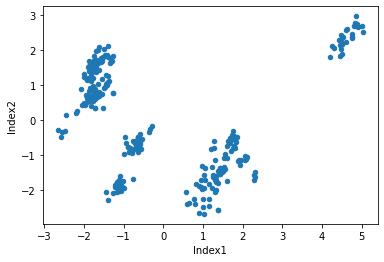

In [31]:
pizza.plot.scatter("Index1", "Index2");

Что примечательно, точки на диаграмме не образуют какое-то хорошо оформленное облако с положительным или отрицательным наклоном. Это обусловлено тем, что теоретически две компоненты независимы, хотя выборочный коэффициент Пирсона между `Index1` и `Index2` нулевым быть не обязан. При этом на диаграмме явно прослеживаются группы наблюдений: четыре или даже пять, если вторую поделить на две. Если мы соберемся на таких данных проводить кластеризацию, она должна получиться довольно успешной.

А пока можем закодировать бренды числами и добавить их на диаграмму (цвет точки зависит от бренда), чтобы понять, связано ли это деление на группы с различиями по брендам:

In [32]:
# map: выполняет замену по парам соотвествий
# пары старое значение-новое значение

pizza["brand_int"] = pizza["brand"].map({"A" : 0, "B" : 1, "C" : 2,
                                         "D" : 3, "E" : 4, "F" : 5, 
                                         "G" : 6, "H" : 7, "I" : 8, 
                                         "J" : 9})

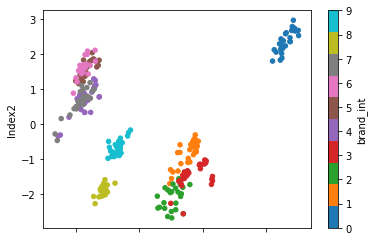

In [33]:
# c - color, цвет точки зависит от значений brand_int
# cmap – color map, цветовая палитра

pizza.plot.scatter("Index1", "Index2", 
                   c = "brand_int", 
                   cmap = "tab10");

Итак, видно, что некоторая зависимость от бренда все-таки есть. Группа точек в правом верхнем углу – это сбалансированные и сытные пиццы, которые производит только бренд A, группа из оранжевых, красных и зеленых точек – это три похожих бренда B, C, D, две небольшие группы из бирюзовых точек и точек болотного цвета – пиццы, несильно сбалансированные по составу и при этом не очень сытные, которые производятся разными брендами I и J.

**NB.** Опять же, в другой версии `sklearn` значения главных компонент будут отличаться по знаку, поэтому картинка выше будет иной, как бы отраженной по вертикали (отличия в весах и знаке второй главной компоненты `Index 2`, а она здесь по вертикальной оси). Но интерпретация от этого не меняется, облако синих точек в таком случае будет в нижнем правом углу, это будут пиццы с большими значениями `Index 1` (сбалансированность состава) и маленькими значениями `Index 2` (легкость пиццы). Выходит, что бренд A выпускает пиццы со сбалансированным составом, но не «легкие», то есть сытные, что полностью соответсвует интерпретации данной картинки и описательных статистик выше.